In [2]:
%pip install -U -q beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [3]:
rank = "tiger"

base_url = f"https://www.scouting.org/programs/cub-scouts/adventures/{rank}/"



In [14]:
from bs4 import BeautifulSoup
import requests


def getHTMLdocument(url):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'}
    response = requests.get(url, headers=headers)
    return response.text

html_document = getHTMLdocument(base_url) 
soup = BeautifulSoup(html_document, 'html.parser') 

In [25]:
# get all adventures
adventures = soup.find_all("div", {"class": f"cs-adv-rank-{rank}"})

adventure_details = [
    ("Bobcat", f"https://www.scouting.org/cub-scout-adventures/bobcat-{rank}/", True)
]
for adventure in adventures:
    classes = adventure.get("class", [])
    required = "cs-adv-type-required" in classes

    details_link = adventure.find("a")

    adventure_details.append((details_link.text, details_link.get("href"), required))


[('Bobcat', 'https://www.scouting.org/cub-scout-adventures/bobcat-tiger/', True), ('Tigers in the Wild', 'https://www.scouting.org/cub-scout-adventures/tigers-in-the-wild/', True), ('Tigers in the Wild', 'https://www.scouting.org/cub-scout-adventures/tigers-in-the-wild/', True), ('Tiger Bites', 'https://www.scouting.org/cub-scout-adventures/tiger-bites/', True), ('Tiger Bites', 'https://www.scouting.org/cub-scout-adventures/tiger-bites/', True), ('Team Tiger', 'https://www.scouting.org/cub-scout-adventures/team-tiger/', True), ('Team Tiger', 'https://www.scouting.org/cub-scout-adventures/team-tiger/', True), ('Tiger’s Roar', 'https://www.scouting.org/cub-scout-adventures/tigers-roar/', True), ('Tiger’s Roar', 'https://www.scouting.org/cub-scout-adventures/tigers-roar/', True), ('Tiger Circles', 'https://www.scouting.org/cub-scout-adventures/tiger-circles/', True), ('Tiger Circles', 'https://www.scouting.org/cub-scout-adventures/tiger-circles/', True), ('Champions for Nature Tiger', 'ht

Bobcat Tiger
The Bobcat Adventure is the first required Adventure on the trail to earn the Tiger badge of rank. Once the Bobcat Adventure is completed, Tigers can start any other of the Adventures in any order.
Requirement 1
Get to know the members of your den.
['2', '1', '1']
A Time to Talk – A Time to Listen https://www.scouting.org/cub-scout-activities/a-time-to-talk-a-time-to-listen/
<!DOCTYPE html>

<html lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="https://fonts.googleapis.com/css?family=Roboto%3A100%2C100italic%2C200%2C200italic%2C300%2C300italic%2C400%2C400italic%2C500%2C500italic%2C600%2C600italic%2C700%2C700italic%2C800%2C800italic%2C900%2C900italic%7CRoboto+Slab%3A100%2C100italic%2C200%2C200italic%2C300%2C300italic%2C400%2C400italic%2C500%2C500italic%2C600%2C600italic%2C700%2C700italic%2C800%2C800italic%2C900%2C900italic&amp;display=swap" id="ao_optimized_gfonts" media="print" onload="this.onlo
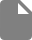
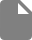
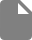
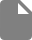
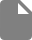
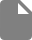

In [88]:
for adventure in adventure_details[:1]:
    name, url, required = adventure

    html_document = getHTMLdocument(url)
    soup = BeautifulSoup(html_document, "html.parser")

    print(soup.find("h1").text)
    print(soup.find("section", {"class": "adv-requirements-snapshot"}).find("p").text)

    requirements = soup.find_all("section", {"class": "adv-requirements"})

    for requirement in requirements[2:]:
        print(requirement.find("h2").text)
        print(requirement.find("p").text)
        activities = requirement.find_all("article")

        for activity in activities[:1]:
            activity_link = activity.find("a")

            print([val.text.strip() for val in activity.find_all("div", {"class": "elementor-icon-box-title"})[1:]])

            print(activity_link.text, activity_link.get("href"))
            
            html_document = getHTMLdocument(activity_link.get("href"))
            soup = BeautifulSoup(html_document, "html.parser")
            
            print(soup)